# MBTI Project - Exploratory Data Analysis
<br>

<div class="span5 alert alert-info">
<h3>Introduction</h3>
    <p>This section comes after the <b>Data Wrangling</b> step. In the following lines of code you will find my Exploratory Data Analysis. This step involves creating plots and charts to understand the relationship between data and the features of that data.<p>
</div>

<br>

### Table of Contents

- [Importing Libraries](#importing)
- [Review of our Dataset](#review)
- [Dropping columns](#drop)
- [Color Setting](#colors)
- [Visualizations](#visuals)
    - [Categorical Data](#visuals)
    - [Heatmap](#heatmap)
    - [Boxplot - Avg. Number of Characters](#characters)
    - [Boxplot - Avg. Number of Links](#links)
    - [Boxplot - Avg. Use of Emoticons](#emoticons)
    - [Boxplot - Avg. Self-mentions and mentions of other MBTI types](#mentions)
    - [Boxplot - Avg. Use of Pronouns](#pronouns)
    - [Boxplot - Avg. Use of Positive & Negative words](#posneg)<br><br>
    <b>Note: The boxplot sections also include some statistical analysis</b>

<a id=importing></a>

## Imports
***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.transforms
from matplotlib.patches import Patch
import seaborn as sns
import re
from scipy import stats

%matplotlib inline
sns.set(rc={'axes.facecolor':'white'})

In [2]:
df = pd.read_csv('../../data/mbti_interim.csv', index_col=0)

<a id=review></a>

<br>


## Reviewing our Dataset
***

In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
I,8675.0,0.769568,0.421134,0.0,1.00,1.000000,1.00,1.000000
J,8675.0,0.395850,0.489061,0.0,0.00,0.000000,1.00,1.000000
N,8675.0,0.862017,0.344902,0.0,1.00,1.000000,1.00,1.000000
T,8675.0,0.458905,0.498337,0.0,0.00,0.000000,1.00,1.000000
NF,8675.0,0.480346,0.499642,0.0,0.00,0.000000,1.00,1.000000
...,...,...,...,...,...,...,...,...
avg_third_person,8675.0,0.415968,0.252414,0.0,0.24,0.361702,0.54,3.120000
positive_words,8675.0,39.527608,13.471651,0.0,30.00,40.000000,49.00,111.000000
avg_positive_words,8675.0,0.810456,0.262999,0.0,0.64,0.800000,0.98,2.220000
negative_words,8675.0,27.081960,10.352061,0.0,20.00,27.000000,34.00,78.000000


In [4]:
df.head()

,type,posts,I,J,N,T,NF,NT,SP,SJ,...,them_count,their_count,theirs_count,themselves_count,total_third_person,avg_third_person,positive_words,avg_positive_words,negative_words,avg_negative_words
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,1,1,1,0,1,0,0,0,...,1,2,0,0,7,0.14,19,0.38,9,0.18
1,ENTP,'I'm finding the lack of me in these posts ver...,0,0,1,1,0,1,0,0,...,5,4,0,1,20,0.40,38,0.76,24,0.48
2,INTP,'Good one _____ https://www.youtube.com/wat...,1,0,1,1,0,1,0,0,...,2,0,0,0,3,0.06,35,0.70,18,0.36
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",1,1,1,1,0,1,0,0,...,2,2,0,0,15,0.30,23,0.46,19,0.38
4,ENTJ,'You're fired.|||That's another silly misconce...,0,1,1,1,0,1,0,0,...,2,6,0,1,37,0.74,33,0.66,29,0.58


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8675 entries, 0 to 8674
Data columns (total 79 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   type                    8675 non-null   object 
 1   posts                   8675 non-null   object 
 2   I                       8675 non-null   int64  
 3   J                       8675 non-null   int64  
 4   N                       8675 non-null   int64  
 5   T                       8675 non-null   int64  
 6   NF                      8675 non-null   int64  
 7   NT                      8675 non-null   int64  
 8   SP                      8675 non-null   int64  
 9   SJ                      8675 non-null   int64  
 10  posts_len               8675 non-null   int64  
 11  posts_separated         8675 non-null   object 
 12  count_posts             8675 non-null   int64  
 13  avg_num_char_x_post     8675 non-null   float64
 14  num_of_links            8675 non-null   

<a id=drop></a>

<a id='drop'></a>

## Dropping Columns
***

<br>

**Note:** The number of columns at our disposal are too many for what we need (79), in the next lines of code we will drop some of the least relevant ones. 
We will strat by dropping the "text" columns, we might use them later for other analysis so we will keep them in a separate dataframe.

In [6]:
df_text = df[['type','posts','posts_separated']]

In [7]:
df_text.head() # 

,type,posts,posts_separated
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,"[""'http://www.youtube.com/watch?v=qsXHcwe3krw""..."
1,ENTP,'I'm finding the lack of me in these posts ver...,"[""'I'm finding the lack of me in these posts v..."
2,INTP,'Good one _____ https://www.youtube.com/wat...,"[""'Good one _____ https://www.youtube.com/w..."
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...","[""'Dear INTP, I enjoyed our conversation the..."
4,ENTJ,'You're fired.|||That's another silly misconce...,"[""'You're fired."", ""That's another silly misco..."


In [8]:
df.drop(['posts','posts_separated'], axis=1, inplace= True)


### Mentions columns

We will reduce the number of mentions columns, from having one for each type to having the number of self-referencing and references to other MBTI types

In [9]:
mention_columns = df.iloc[:,22:38].columns.values

In [10]:
new_columns = dict(zip(mention_columns, [re.sub(r'_.*$','',x) for x in mention_columns]))

In [11]:
df=df.rename(columns = new_columns)

In [12]:
mentions_others = []
for e,i in enumerate(df['type']):
    result = df.drop(i, axis=1).iloc[e,22:37].sum()
    mentions_others.append(result) 

In [13]:
df.insert(loc=38, column='mentions_others', value=mentions_others)

In [14]:
df.insert(loc=38, column='self_mentions', value=(df['total_mentions']-df['mentions_others'])) 

In [15]:
# Let's check to see if our code worked well
df.iloc[:,38:41].head()

,self_mentions,mentions_others,total_mentions
0,2,6,8
1,10,9,19
2,1,3,4
3,2,10,12
4,4,1,5


In [16]:
# We create this global variable since we will need to refer to it several times
mbti_types = ['ENFJ', 'ENFP', 'ENTJ', 'ENTP', 'ESFJ', 'ESFP', 'ESTJ', 'ESTP', 'INFJ', 'INFP', 'INTJ', 'INTP', 'ISFJ', 'ISFP', 'ISTJ', 'ISTP']

In [17]:
# we can now drop the old columns
df.drop(mbti_types, axis=1, inplace=True)

In [18]:
# we can also drop the emoticons columns except the total and average
emoticons_list = [':D_count',';D_count', ':)_count', ';)_count', ':(_count', 'xD_count', 'XD_count']
df.drop(emoticons_list, axis=1, inplace=True)

In [19]:
# we have the 1st person, 2nd person, and 3rd person total columns, we can keep those and drop the rest
pronouns_list = ['I_count', 'me_count','my_count', 'mine_count', 'myself_count', 'We_count', 'us_count','our_count', 'ourselves_count',
                'you_count', 'your_count', 'yours_count','yourself_count', 'yourselves_count',
                'he_count', 'him_count', 'his_count','himself_count', 'she_count', 'her_count', 'hers_count', 'herself_count', 'they_count', 'them_count', 'their_count', 'theirs_count', 'themselves_count']
df.drop(pronouns_list, axis=1, inplace=True)

In [20]:
# we can also drop the 'posts_len' column since it is very dependent on the 'count_posts' column
df.drop('posts_len', axis=1, inplace=True)

### Correcting some columns

In [21]:
# As we saw in the data wrangling section, it is best we take the average of the columns since for some people only a handful of posts were collected.
avg_links = df['num_of_links'] / df['count_posts']
df.insert(loc=df.columns.get_loc("num_of_links"), column='avg_links', value=avg_links)
df.drop('num_of_links', axis=1, inplace=True)

In [22]:
# we will do the same wiht the mentions columns
mentions_corrected = ['self_mentions', 'mentions_others','total_mentions']

for column in mentions_corrected:
    average = df[column] / df['count_posts']
    location = df.columns.get_loc(column)
    df.insert(loc=location, column='avg_'+column, value=average)
    df.drop(column, axis=1, inplace=True)

In [23]:
# we will drop other columns
drop_columns = ['count_posts','total_emoticons', 'total_first_person', 'total_second_person', 'total_third_person', 'positive_words', 'negative_words', 'avg_mentions_per_post']
df.drop(drop_columns, axis=1, inplace=True)

In [24]:
# let's check the number of remaining columns
len(df.columns)

20

<a id=colors></a>

<br>

## Colors
***

We create lists of HEX, RGB, and % RGB colors to keep a homogeneous look across visualizations

In [25]:
colors_types = {'INFP':'#AD3139','INFJ':'#C64D43','INTP':'#D66C54','INTJ':'#E28C64','ENTP':'#E9AB72','ENFP':'#EEC58A','ISTP' : '#F2DDA3','ISFP' : '#F5EEBA','ENTJ' : '#F2F6D4','ISTJ' : '#E6F2F0','ENFJ' : '#CCE4EC','ISFJ' : '#B0D3DF','ESTP' : '#91BACF','ESFP' : '#769EBE','ESFJ' : '#5C80AC','ESTJ' : '#4A619A'}
colors_main = {'I':'#a50026','E':'#d73027','S':'#f46d43','N':'#fdae61','T':'#fee090','F':'#ffffbf','P':'#e0f3f8','J':'#abd9e9'}
colors_keirsey = {'NF':'#a50026', 'NT':'#fdae61' ,'SP':'#abd9e9', 'SJ':'#313695'}

In [26]:
def hex_rgb_converter(dictionary, dictionary_name):
    dictionary_name = {}
    for k, v in dictionary.items():
        v = v.lstrip('#')  
        result = tuple(int(v[i:i+2], 16) for i in (0, 2, 4))
        dictionary_name[k] = result
    return dictionary_name

In [27]:
colors_main_rgb = hex_rgb_converter(colors_main, 'colors_main_rgb')
colors_types_rgb = hex_rgb_converter(colors_types, 'colors_type_rgb')
colors_keirsey_rgb = hex_rgb_converter(colors_keirsey, 'colors_keirsey_rgb')

In [28]:
def rgb_pct_converter(dictionary, dictionary_name):
        dictionary_name = {}
        for k, v in dictionary.items():
            result = [x/255 for x in v]
            result.append(1.0)
            dictionary_name[k] = result
        return dictionary_name

In [29]:
colors_main_rgb_pct = rgb_pct_converter(colors_main_rgb, 'colors_main_rgb_pct')
colors_types_rgb_pct = rgb_pct_converter(colors_types_rgb, 'colors_types_rgb_pct')
colors_keirsey_rgb_pct = rgb_pct_converter(colors_keirsey_rgb, 'colors_keirsey_rgb_pct')

<a id=visuals></a>

<br>

## Visuals

***


### Visualizing the Categorical Data

In [30]:
df_cat = df.select_dtypes(include='object').copy()
df_cat.type.value_counts()

INFP    1832
INFJ    1470
INTP    1304
INTJ    1091
ENTP     685
ENFP     675
ISTP     337
ISFP     271
ENTJ     231
ISTJ     205
ENFJ     190
ISFJ     166
ESTP      89
ESFP      48
ESFJ      42
ESTJ      39
Name: type, dtype: int64

In [31]:
# Let's first save the order of the previous visualization to avoid mismatching mbti types
sorter = df_cat['type'].value_counts().index.to_list()

In [32]:
# We import another dataset with data we scrapped from 16personalities to compare our data with the one from the general population
df_global = pd.read_csv('../../data/16personalities.csv')

In [33]:
# Let's check how it looks like
df_global.head()

,code,percentage
0,enfj,0.074567
1,enfp,0.144600
2,entj,0.024050
3,entp,0.044300
4,esfj,0.090000


In [34]:
# We convert the code (which is the MBTI type) to uppercase letters
df_global['code'] = df_global['code'].apply(lambda x:x.upper())

In [35]:
# Create the dictionary that defines the order for sorting
sorterIndex = dict(zip(sorter,range(len(sorter))))

# Generate a rank column that will be used to sort the dataframe numerically
df_global['Rank'] = df_global['code'].map(sorterIndex)

# Sort the dataframe
df_global.sort_values('Rank', ascending = True, inplace = True)

In [36]:
# We can look at the new dataframe with the ranking column
df_global

,code,percentage,Rank
9,INFP,0.156667,0
8,INFJ,0.079200,1
11,INTP,0.055067,2
10,INTJ,0.031433,3
3,ENTP,0.044300,4
1,ENFP,0.144600,5
15,ISTP,0.020900,6
13,ISFP,0.054967,7
2,ENTJ,0.024050,8
14,ISTJ,0.031450,9


<ipython-input-37-66ecd8af186f>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(x)


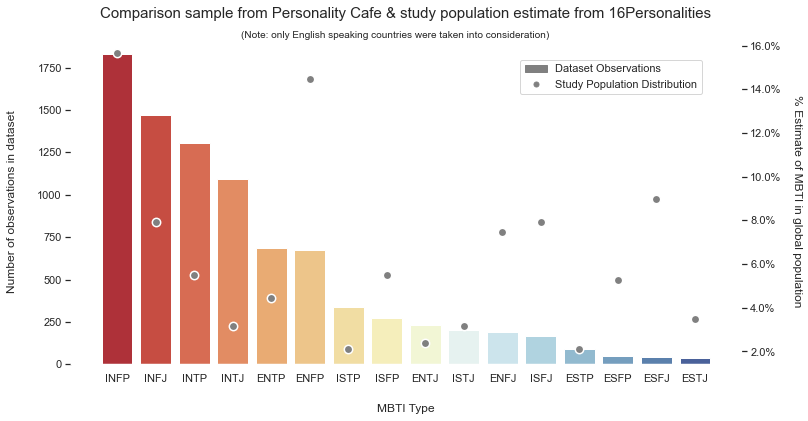

In [37]:
fig, ax = plt.subplots(figsize=(12,6))

# Countplot
sns.countplot(x='type', data=df_cat, order= df_cat['type'].value_counts().index, palette='RdYlBu', ax=ax)
plt.ylabel('Number of observations in dataset', labelpad=20)
plt.xlabel('MBTI Type',labelpad=20)

# Scatterplot Data
x = df_global['code'].to_list()
y = np.array(df_global['percentage']*100)

# Scatterplot
ax2 = ax.twinx()
sns.scatterplot(x, y, ax=ax2,  s=70, facecolors='grey', edgecolors='b', linewidth=1.5)
ax2.set_xticklabels(x)
ax2.grid(False)
ax2.yaxis.set_major_formatter(mtick.PercentFormatter())
ax2.set_ylabel('% Estimate of MBTI in global population', rotation=270, labelpad=20)

# Legend
bars = Patch(color='gray', label='Dataset Observations')
dots = matplotlib.lines.Line2D([], [], color='gray', marker='o', linestyle='None', markersize=5, label='Study Population Distribution')
plt.legend(handles=[bars, dots], loc='best', bbox_to_anchor=(0.45, 0.45, 0.5, 0.5))

plt.title('Comparison sample from Personality Cafe & study population estimate from 16Personalities',size=15,pad=20)
plt.figtext(.5,.88,'(Note: only English speaking countries were taken into consideration)',fontsize=10,ha='center')
plt.savefig('Figures/countplot_types_comparison_population.png', dpi=300)

plt.show()


<br>

**We can see that there are quite a lot more cases of Intuition (N) than Sensing (S) and in the first category, Introversion (I) has more cases than Extraversion (E). We can see there is quite a big difference between our data an the target population... this is something to consider later on.**

<br>

### Heatmap
***

There are many variables in our dataset that are similar amongst them. We will focus on 5 variables:
- Average number of characters per post
- Number of links
- How many times the reference their own MBTI type (self mentions)
- Total number of emojis they use

In [38]:
df_heatmap = df.set_index('type')

In [39]:
# We standardize the columns 
df_norm_col=(df_heatmap-df_heatmap.mean())/df_heatmap.std()

In [40]:
# There are fields that really do not add a lot of value because they are clearly correlated with the target label, we will drop them. We will also drop the total columns and keep only the averages.
drop = ['I','J','N','T','NT','NF','SP','SJ']

In [41]:
df_heatmap.columns

Index(['I', 'J', 'N', 'T', 'NF', 'NT', 'SP', 'SJ', 'avg_num_char_x_post',
       'avg_links', 'avg_emoticons_per_post', 'avg_self_mentions',
       'avg_mentions_others', 'avg_total_mentions', 'avg_first_person',
       'avg_second_person', 'avg_third_person', 'avg_positive_words',
       'avg_negative_words'],
      dtype='object')

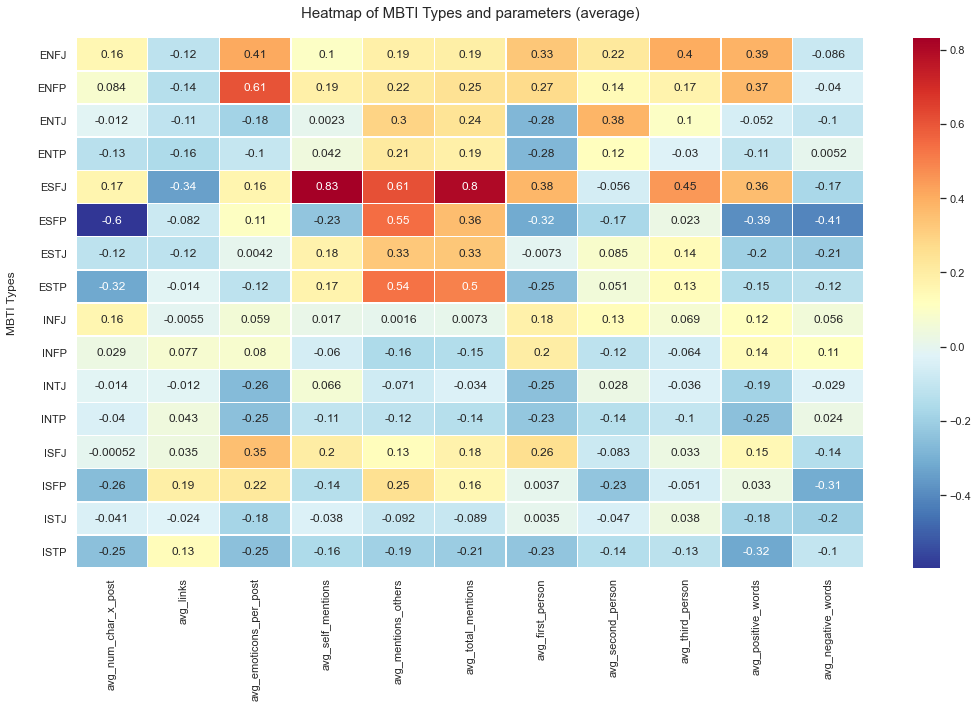

In [42]:
plt.figure(figsize=(15,10))
           
ax = sns.heatmap(df_norm_col.drop(drop, axis=1).groupby('type').mean(), cmap='RdYlBu_r', linewidths=0.5, annot=True)

plt.ylabel('MBTI Types', labelpad=20)
plt.yticks(rotation = 0)
plt.title('Heatmap of MBTI Types and parameters (average)', size=15, pad=20)

plt.tight_layout()
plt.savefig('Figures/Heatmap_target.png', dpi=300)

plt.show()

<a id=characters></a>

<br>

### Avg. Number of characters per post
***

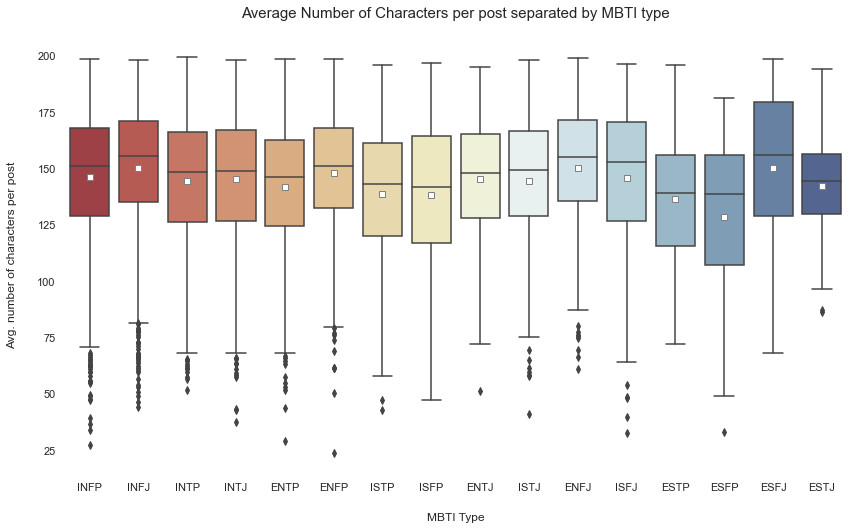

In [43]:
plt.figure(figsize=(14,8))

sns.set_palette(sns.color_palette(list(colors_types.values())))
sns.boxplot(x='type',y='avg_num_char_x_post', data=df, order=sorter, showmeans=True, meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"grey"})
#sns.swarmplot(x='type', y="avg_num_char_x_post", data=df, color='k', alpha=0.3, order=sorter)

plt.title('Average Number of Characters per post separated by MBTI type', size=15, pad=20)
plt.xlabel('MBTI Type', labelpad=20)
plt.ylabel('Avg. number of characters per post', labelpad=20)

plt.savefig('Figures/Boxplot_Num_Characters_types.png', dpi=300)

plt.show()

**Test for Normality**

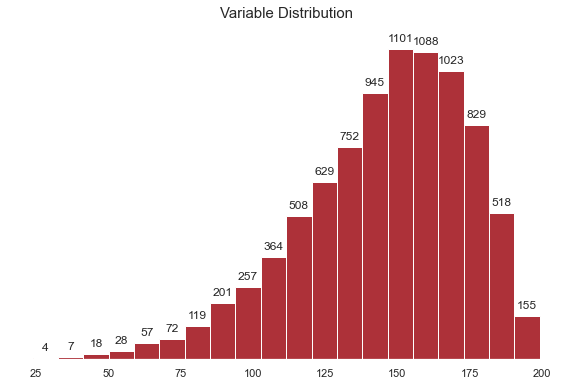

In [44]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(df.avg_num_char_x_post, density=False, bins=20)
ax.axes.get_yaxis().set_visible(False)

for rect in ax.patches:
    height = rect.get_height()
    ax.annotate(f'{int(height)}', xy=(rect.get_x()+rect.get_width()/2, height), 
                xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')
plt.title('Variable Distribution', pad = 15, size = 15)
plt.show()

**Kruskal-Wallis Test by Ranks**

In [45]:
list_array = []

for mtype in mbti_types:
    
    result = df[df['type'] == mtype]['avg_num_char_x_post']
    list_array.append(result)
    
H, pval = stats.kruskal(list_array[0],list_array[1],list_array[2],list_array[3],
                       list_array[4],list_array[5],list_array[6],list_array[7],
                       list_array[8],list_array[9],list_array[10],list_array[11],
                       list_array[12],list_array[13],list_array[14],list_array[15])
    
print("H-statistic:", H)
print("P-Value:", pval)

if pval < 0.05:
    print("Reject NULL hypothesis - Significant differences exist between groups.")
if pval > 0.05:
    print("Accept NULL hypothesis - No significant difference between groups.")

H-statistic: 135.6341838645423
P-Value: 1.6673085613521744e-21
Reject NULL hypothesis - Significant differences exist between groups.


https://stats.stackexchange.com/questions/79289/why-is-statistically-significant-not-enough/79304#79304

**Post hoc Dunn's Adjustment**

In [46]:
import scikit_posthocs as sp
dunn = sp.posthoc_dunn(list_array, p_adjust='bonferroni', sort=False)

In [47]:
dunn.columns = mbti_types
dunn['types'] = mbti_types
dunn = dunn.set_index('types')

In [48]:
def color_dunn(val):
    if val < 0.05 and val != -1:
        color = 'lightgreen'
        return 'background-color: %s' % color
    else:
        color = None
        return 'background-color: %s' % color

In [49]:
#dunn = dunn.mask(np.triu(np.ones(dunn.shape, dtype=np.bool_)))

dunn = dunn.round(4)
dunn.style.set_precision(4).applymap(color_dunn)

,ENFJ,ENFP,ENTJ,ENTP,ESFJ,ESFP,ESTJ,ESTP,INFJ,INFP,INTJ,INTP,ISFJ,ISFP,ISTJ,ISTP
types,,,,,,,,,,,,,,,,
ENFJ,1.0000,1.0000,1.0000,0.0087,1.0000,0.0088,1.0000,0.0030,1.0000,1.0000,1.0000,0.2715,1.0000,0.0020,1.0000,0.0003
ENFP,1.0000,1.0000,1.0000,0.0175,1.0000,0.0584,1.0000,0.0217,1.0000,1.0000,1.0000,1.0000,1.0000,0.0077,1.0000,0.0004
ENTJ,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.1493,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
ENTP,0.0087,0.0175,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000,0.0127,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
ESFJ,1.0000,1.0000,1.0000,1.0000,1.0000,0.1993,1.0000,0.3012,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.6861
ESFP,0.0088,0.0584,1.0000,1.0000,0.1993,1.0000,1.0000,1.0000,0.0018,0.0996,0.3873,0.7272,0.2183,1.0000,1.0000,1.0000
ESTJ,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
ESTP,0.0030,0.0217,1.0000,1.0000,0.3012,1.0000,1.0000,1.0000,0.0001,0.0393,0.2797,0.6513,0.2040,1.0000,1.0000,1.0000
INFJ,1.0000,1.0000,0.1493,0.0000,1.0000,0.0018,1.0000,0.0001,1.0000,0.0032,0.0001,0.0000,1.0000,0.0000,0.4584,0.0000


[Dunn Interpretation](https://stats.stackexchange.com/questions/126686/how-to-read-the-results-of-dunns-test)

**Effect Size with Hedges' g**

In [50]:
mean = np.mean(df.avg_num_char_x_post)
std = np.std(df.avg_num_char_x_post)
print(mean)
print(std)

145.46464059537522
28.866481389886747


In [51]:
dictionary = {}

for mtype in mbti_types:
    count = len(df[df['type'] == mtype]['avg_num_char_x_post'])
    mean = np.mean(df[df['type'] == mtype]['avg_num_char_x_post'])
    std = np.std(df[df['type'] == mtype]['avg_num_char_x_post'])
    dictionary[mtype] = [count, mean, std]

In [52]:
hedges = pd.DataFrame(dictionary).T

In [53]:
hedges.columns = ['Count', 'Mean', 'Std']

In [54]:
hedges.head(3)

,Count,Mean,Std
ENFJ,190.0,149.979981,29.180304
ENFP,675.0,147.890711,26.873478
ENTJ,231.0,145.113648,26.082768


[Pooled Standard Deviation](http://goldbook.iupac.org/terms/view/P04758)

In [55]:
items = []

for i in hedges.iterrows():
    
    result = ((i[1][0]-1)*(i[1][2]**2))
    items.append(result)

pooled_std = np.sqrt((sum(items)) / (hedges.Count.sum() - len(hedges.Count)))
pooled_std

28.64869151212286

In [56]:
items = []

for i in hedges.iterrows():
    result = i[1][0]*i[1][1]
    items.append(result)

pooled_mean = sum(items) / (hedges.Count.sum())
pooled_mean

145.4646405953752

In [57]:
hedges['hedges_g'] = list(map(lambda x : round((x - pooled_mean)/pooled_std,2), hedges['Mean']))

In [58]:
def color_rgy(val):
    if val > 0.8 or val < -0.8:
        color = 'red'
        return 'background-color: %s' % color
    elif val > 0.5 or val < -0.5:
        color = 'orange'
        return 'background-color: %s' % color
    elif val > 0.2 or val < -0.2:
        color = 'lightgreen'
        return 'background-color: %s' % color
    else:
        color = None
        return 'background-color: %s' % color

In [59]:
hedges
hedges.style.applymap(color_rgy, subset=pd.IndexSlice['hedges_g'])

,Count,Mean,Std,hedges_g
ENFJ,190.000000,149.979981,29.180304,0.160000
ENFP,675.000000,147.890711,26.873478,0.080000
ENTJ,231.000000,145.113648,26.082768,-0.010000
ENTP,685.000000,141.686371,28.684845,-0.130000
ESFJ,42.000000,150.274701,33.550198,0.170000
ESFP,48.000000,128.240393,36.664127,-0.600000
ESTJ,39.000000,142.004465,25.775793,-0.120000
ESTP,89.000000,136.280449,27.408907,-0.320000
INFJ,1470.000000,150.098757,28.240643,0.160000
INFP,1832.000000,146.307324,28.978885,0.030000


<a id=links></a>

<br>
<br>

### Number of Links

***

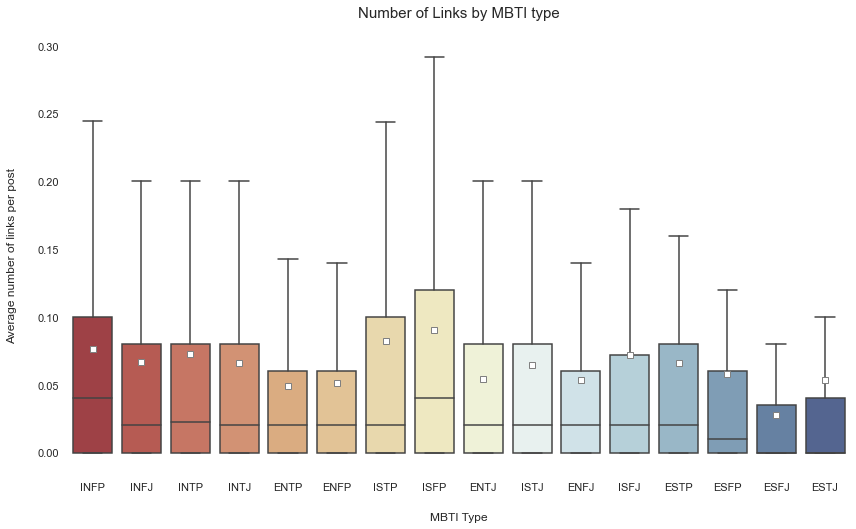

In [60]:
plt.figure(figsize=(14,8))

sns.set_palette(sns.color_palette(list(colors_types.values())))
sns.boxplot(x='type',y='avg_links', data=df, order=sorter, showfliers=False, showmeans=True, meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"grey"})

plt.title('Number of Links by MBTI type', size=15, pad=20)
plt.xlabel('MBTI Type', labelpad=20)
plt.ylabel('Average number of links per post', labelpad=20)

plt.savefig('Figures/Boxplot_Num_Links_types.png', dpi=300)

plt.show()

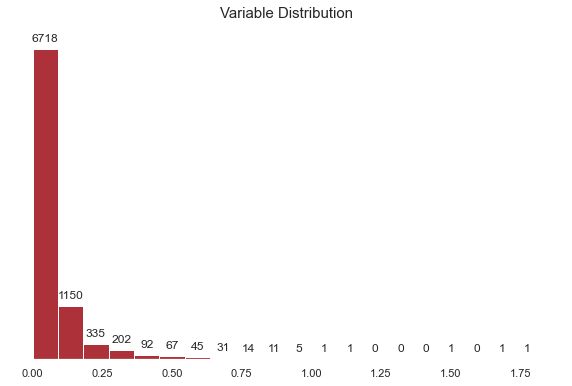

In [61]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(df.avg_links, density=False, bins=20)
ax.axes.get_yaxis().set_visible(False)

for rect in ax.patches:
    height = rect.get_height()
    ax.annotate(f'{int(height)}', xy=(rect.get_x()+rect.get_width()/2, height), 
                xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')
    
plt.title('Variable Distribution', pad = 15, size = 15)
plt.show()

In [162]:
list_array = []

for mtype in mbti_types:
    
    result = df[df['type'] == mtype]['avg_links']
    list_array.append(result)
    
H, pval = stats.kruskal(list_array[0],list_array[1],list_array[2],list_array[3],
                       list_array[4],list_array[5],list_array[6],list_array[7],
                       list_array[8],list_array[9],list_array[10],list_array[11],
                       list_array[12],list_array[13],list_array[14],list_array[15])
    
print("H-statistic:", H)
print("P-Value:", pval)

if pval < 0.05:
    print("Reject NULL hypothesis - Significant differences exist between groups.")
if pval > 0.05:
    print("Accept NULL hypothesis - No significant difference between groups.")

H-statistic: 83.09387036583148
P-Value: 1.8901763836772887e-11
Reject NULL hypothesis - Significant differences exist between groups.


**Post hoc Dunn's Adjustment**

In [163]:
dunn = sp.posthoc_dunn(list_array, p_adjust='bonferroni', sort=False)

In [164]:
dunn.columns = mbti_types
dunn['types'] = mbti_types
dunn = dunn.set_index('types')

In [165]:
def color_dunn(val):
    if val < 0.05 and val != -1:
        color = 'lightgreen'
        return 'background-color: %s' % color
    else:
        color = None
        return 'background-color: %s' % color

In [166]:
dunn = dunn.round(4)
dunn.style.set_precision(4).applymap(color_dunn)

,ENFJ,ENFP,ENTJ,ENTP,ESFJ,ESFP,ESTJ,ESTP,INFJ,INFP,INTJ,INTP,ISFJ,ISFP,ISTJ,ISTP
types,,,,,,,,,,,,,,,,
ENFJ,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.1375,1.0000,0.5617,1.0000,0.0451,1.0000,0.6815
ENFP,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.9380,0.0002,1.0000,0.0077,1.0000,0.0024,1.0000,0.1120
ENTJ,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.9102,1.0000,1.0000,1.0000,0.2553,1.0000,1.0000
ENTP,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.8103,0.0001,1.0000,0.0061,1.0000,0.0021,1.0000,0.0995
ESFJ,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.3334,0.1192,0.0113,0.3298,0.0252,0.8663,0.0031,0.6727,0.0219
ESFP,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
ESTJ,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.7972,1.0000,1.0000,1.0000,0.2465,1.0000,1.0000
ESTP,1.0000,1.0000,1.0000,1.0000,0.3334,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
INFJ,1.0000,0.9380,1.0000,0.8103,0.1192,1.0000,1.0000,1.0000,1.0000,0.8684,1.0000,1.0000,1.0000,0.6858,1.0000,1.0000


**Effect Size with Hedges' g**

In [167]:
mean = np.mean(df.avg_links)
std = np.std(df.avg_links)
print(mean)
print(std)

0.06749841819593673
0.11725194035049204


In [168]:
dictionary = {}

for mtype in mbti_types:
    count = len(df[df['type'] == mtype]['avg_links'])
    mean = np.mean(df[df['type'] == mtype]['avg_links'])
    std = np.std(df[df['type'] == mtype]['avg_links'])
    dictionary[mtype] = [count, mean, std]
    print(f'{mtype}: Count = {count}, Mean = {round(mean,2)}, Std = {round(std,2)}')

ENFJ: Count = 190, Mean = 0.05, Std = 0.1
ENFP: Count = 675, Mean = 0.05, Std = 0.09
ENTJ: Count = 231, Mean = 0.05, Std = 0.08
ENTP: Count = 685, Mean = 0.05, Std = 0.08
ESFJ: Count = 42, Mean = 0.03, Std = 0.05
ESFP: Count = 48, Mean = 0.06, Std = 0.11
ESTJ: Count = 39, Mean = 0.05, Std = 0.13
ESTP: Count = 89, Mean = 0.07, Std = 0.13
INFJ: Count = 1470, Mean = 0.07, Std = 0.12
INFP: Count = 1832, Mean = 0.08, Std = 0.12
INTJ: Count = 1091, Mean = 0.07, Std = 0.12
INTP: Count = 1304, Mean = 0.07, Std = 0.12
ISFJ: Count = 166, Mean = 0.07, Std = 0.14
ISFP: Count = 271, Mean = 0.09, Std = 0.14
ISTJ: Count = 205, Mean = 0.06, Std = 0.11
ISTP: Count = 337, Mean = 0.08, Std = 0.15


In [169]:
hedges = pd.DataFrame(dictionary).T

In [170]:
hedges.columns = ['Count', 'Mean', 'Std']

In [171]:
hedges.head(3)

,Count,Mean,Std
ENFJ,190.0,0.053700,0.101253
ENFP,675.0,0.051617,0.087344
ENTJ,231.0,0.054410,0.084802


[Pooled Standard Deviation](http://goldbook.iupac.org/terms/view/P04758)

In [172]:
items = []

for i in hedges.iterrows():
    
    result = ((i[1][0]-1)*(i[1][2]**2))
    items.append(result)

pooled_std = np.sqrt((sum(items)) / (hedges.Count.sum() - len(hedges.Count)))
pooled_std

0.11677298276990034

In [173]:
items = []

for i in hedges.iterrows():
    result = i[1][0]*i[1][1]
    items.append(result)

pooled_mean = sum(items) / (hedges.Count.sum())
pooled_mean

0.06749841819593672

In [174]:
hedges['hedges_g'] = list(map(lambda x : round((x - pooled_mean)/pooled_std,2), hedges['Mean']))

In [175]:
hedges
hedges.style.applymap(color_rgy, subset=pd.IndexSlice['hedges_g'])

,Count,Mean,Std,hedges_g
ENFJ,190.000000,0.053700,0.101253,-0.120000
ENFP,675.000000,0.051617,0.087344,-0.140000
ENTJ,231.000000,0.054410,0.084802,-0.110000
ENTP,685.000000,0.048719,0.077758,-0.160000
ESFJ,42.000000,0.027594,0.046561,-0.340000
ESFP,48.000000,0.057889,0.109902,-0.080000
ESTJ,39.000000,0.053183,0.129565,-0.120000
ESTP,89.000000,0.065853,0.132819,-0.010000
INFJ,1470.000000,0.066857,0.117247,-0.010000
INFP,1832.000000,0.076541,0.121458,0.080000


<a id=emoticons></a>

<br>
<br>

### Use of emoticons

***

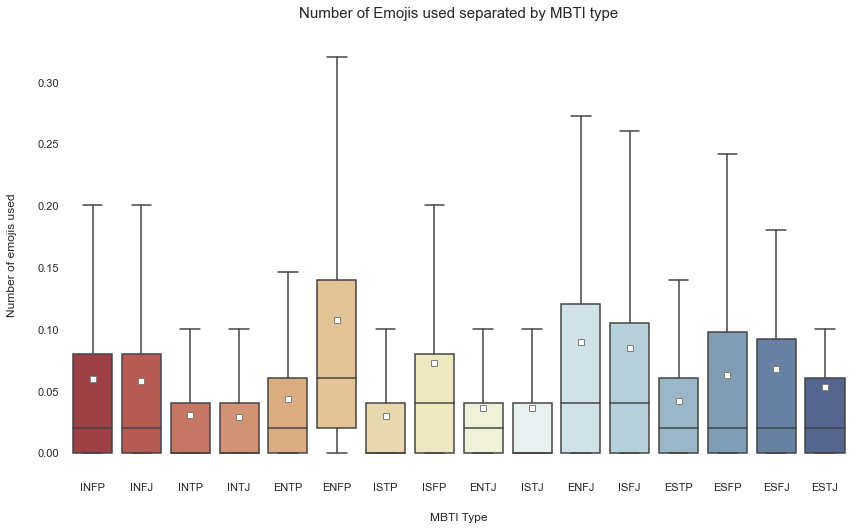

In [176]:
plt.figure(figsize=(14,8))

sns.set_palette(sns.color_palette(list(colors_types.values())))
sns.boxplot(x='type',y='avg_emoticons_per_post', data=df, order=sorter, showmeans=True, showfliers=False,meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"grey"})
#sns.swarmplot(x='type', y="Total_Emojis", data=df, color='k', alpha=0.3, order=sorter)

plt.title('Number of Emojis used separated by MBTI type', size=15, pad=20)
plt.xlabel('MBTI Type', labelpad=20)
plt.ylabel('Number of emojis used', labelpad=20)

plt.savefig('Figures/Boxplot_Use_Emojis_type.png', dpi=300)

plt.show()

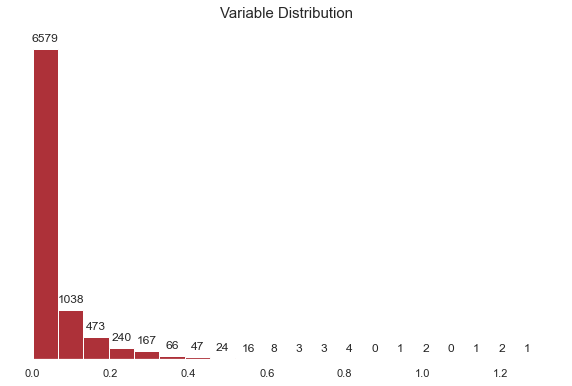

In [177]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(df.avg_emoticons_per_post, density=False, bins=20)
ax.axes.get_yaxis().set_visible(False)

for rect in ax.patches:
    height = rect.get_height()
    ax.annotate(f'{int(height)}', xy=(rect.get_x()+rect.get_width()/2, height), 
                xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')
    
plt.title('Variable Distribution', pad = 15, size = 15)
plt.show()

In [178]:
list_array = []

for mtype in mbti_types:
    
    result = df[df['type'] == mtype]['avg_emoticons_per_post']
    list_array.append(result)
    
H, pval = stats.kruskal(list_array[0],list_array[1],list_array[2],list_array[3],
                       list_array[4],list_array[5],list_array[6],list_array[7],
                       list_array[8],list_array[9],list_array[10],list_array[11],
                       list_array[12],list_array[13],list_array[14],list_array[15])
    
print("H-statistic:", H)
print("P-Value:", pval)

if pval < 0.05:
    print("Reject NULL hypothesis - Significant differences exist between groups.")
if pval > 0.05:
    print("Accept NULL hypothesis - No significant difference between groups.")

H-statistic: 592.2439806503324
P-Value: 1.5771965404133497e-116
Reject NULL hypothesis - Significant differences exist between groups.


**Post hoc Dunn's Adjustment**

In [179]:
dunn = sp.posthoc_dunn(list_array, p_adjust='bonferroni', sort=False)

In [180]:
dunn.columns = mbti_types
dunn['types'] = mbti_types
dunn = dunn.set_index('types')

In [181]:
dunn = dunn.round(4)
dunn.style.set_precision(4).applymap(color_dunn)

,ENFJ,ENFP,ENTJ,ENTP,ESFJ,ESFP,ESTJ,ESTP,INFJ,INFP,INTJ,INTP,ISFJ,ISFP,ISTJ,ISTP
types,,,,,,,,,,,,,,,,
ENFJ,1.0000,1.0000,0.0000,0.0000,1.0000,1.0000,1.0000,0.0459,0.1575,0.1377,0.0000,0.0000,1.0000,1.0000,0.0000,0.0000
ENFP,1.0000,1.0000,0.0000,0.0000,0.6023,1.0000,0.6656,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0347,0.0000,0.0000
ENTJ,0.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0019,0.0015,1.0000,1.0000,0.0000,0.0003,1.0000,1.0000
ENTP,0.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0002,0.0001,0.0003,0.0004,0.0000,0.0003,1.0000,0.0978
ESFJ,1.0000,0.6023,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
ESFP,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.2284,0.2878,1.0000,1.0000,1.0000,0.4239
ESTJ,1.0000,0.6656,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
ESTP,0.0459,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.1435,0.9772,1.0000,1.0000
INFJ,0.1575,0.0000,0.0019,0.0002,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000,0.0000,0.9602,1.0000,0.0004,0.0000


**Effect Size with Hedges' g**

In [182]:
mean = np.mean(df.avg_emoticons_per_post)
std = np.std(df.avg_emoticons_per_post)
print(mean)
print(std)

0.05243389284381124
0.0907956610090175


In [183]:
dictionary = {}

for mtype in mbti_types:
    count = len(df[df['type'] == mtype]['avg_emoticons_per_post'])
    mean = np.mean(df[df['type'] == mtype]['avg_emoticons_per_post'])
    std = np.std(df[df['type'] == mtype]['avg_emoticons_per_post'])
    dictionary[mtype] = [count, mean, std]
    print(f'{mtype}: Count = {count}, Mean = {round(mean,2)}, Std = {round(std,2)}')

ENFJ: Count = 190, Mean = 0.09, Std = 0.12
ENFP: Count = 675, Mean = 0.11, Std = 0.15
ENTJ: Count = 231, Mean = 0.04, Std = 0.06
ENTP: Count = 685, Mean = 0.04, Std = 0.07
ESFJ: Count = 42, Mean = 0.07, Std = 0.12
ESFP: Count = 48, Mean = 0.06, Std = 0.08
ESTJ: Count = 39, Mean = 0.05, Std = 0.08
ESTP: Count = 89, Mean = 0.04, Std = 0.07
INFJ: Count = 1470, Mean = 0.06, Std = 0.08
INFP: Count = 1832, Mean = 0.06, Std = 0.09
INTJ: Count = 1091, Mean = 0.03, Std = 0.05
INTP: Count = 1304, Mean = 0.03, Std = 0.07
ISFJ: Count = 166, Mean = 0.08, Std = 0.12
ISFP: Count = 271, Mean = 0.07, Std = 0.12
ISTJ: Count = 205, Mean = 0.04, Std = 0.07
ISTP: Count = 337, Mean = 0.03, Std = 0.06


In [184]:
hedges = pd.DataFrame(dictionary).T

In [185]:
hedges.columns = ['Count', 'Mean', 'Std']

In [186]:
hedges.head(3)

,Count,Mean,Std
ENFJ,190.0,0.089570,0.123992
ENFP,675.0,0.107531,0.152893
ENTJ,231.0,0.035661,0.060372


[Pooled Standard Deviation](http://goldbook.iupac.org/terms/view/P04758)

In [187]:
items = []

for i in hedges.iterrows():
    
    result = ((i[1][0]-1)*(i[1][2]**2))
    items.append(result)

pooled_std = np.sqrt((sum(items)) / (hedges.Count.sum() - len(hedges.Count)))
pooled_std

0.08796150685811636

In [188]:
items = []

for i in hedges.iterrows():
    result = i[1][0]*i[1][1]
    items.append(result)

pooled_mean = sum(items) / (hedges.Count.sum())
pooled_mean

0.05243389284381124

In [189]:
hedges['hedges_g'] = list(map(lambda x : round((x - pooled_mean)/pooled_std,2), hedges['Mean']))

In [190]:
hedges
hedges.style.applymap(color_rgy, subset=pd.IndexSlice['hedges_g'])

,Count,Mean,Std,hedges_g
ENFJ,190.000000,0.089570,0.123992,0.420000
ENFP,675.000000,0.107531,0.152893,0.630000
ENTJ,231.000000,0.035661,0.060372,-0.190000
ENTP,685.000000,0.043359,0.072161,-0.100000
ESFJ,42.000000,0.067289,0.117706,0.170000
ESFP,48.000000,0.062475,0.081122,0.110000
ESTJ,39.000000,0.052818,0.080008,0.000000
ESTP,89.000000,0.041525,0.066576,-0.120000
INFJ,1470.000000,0.057834,0.084231,0.060000
INFP,1832.000000,0.059687,0.089194,0.080000


<a id=mentions></a>

<br>
<br>

### Mentions

***

In [191]:
df.columns

Index(['type', 'I', 'J', 'N', 'T', 'NF', 'NT', 'SP', 'SJ',
       'avg_num_char_x_post', 'avg_links', 'avg_emoticons_per_post',
       'avg_self_mentions', 'avg_mentions_others', 'avg_total_mentions',
       'avg_first_person', 'avg_second_person', 'avg_third_person',
       'avg_positive_words', 'avg_negative_words'],
      dtype='object')

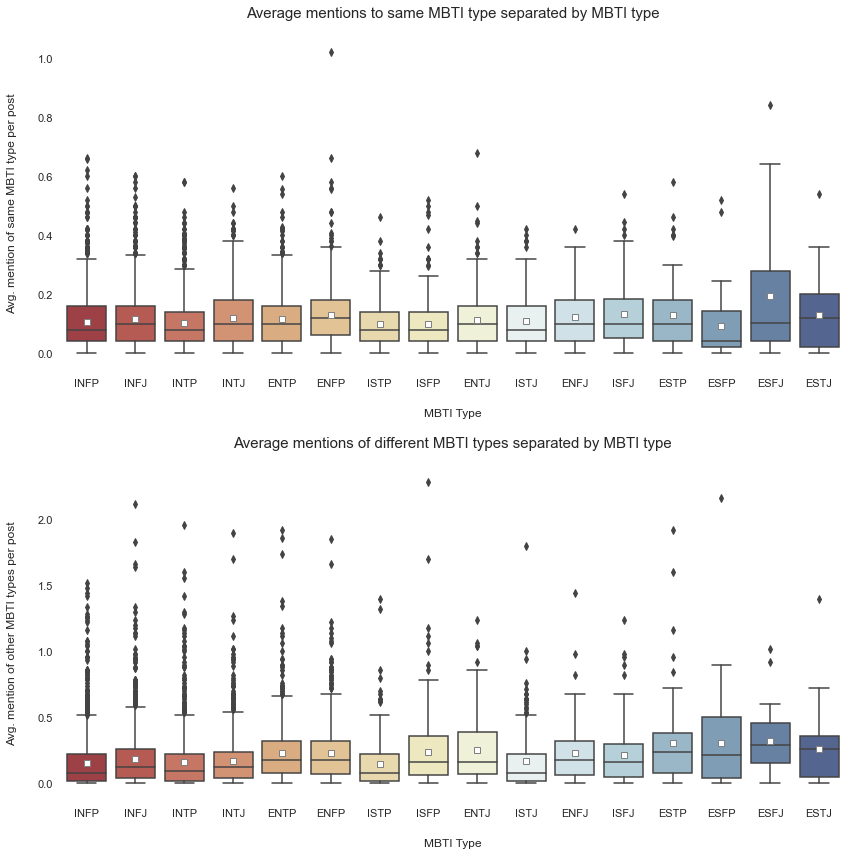

In [192]:
plt.figure(figsize=(14,14))
plt.subplots_adjust(hspace=0.3)


plt.subplot(2,1,1)
sns.set_palette(sns.color_palette(list(colors_types.values())))
sns.boxplot(x='type',y='avg_self_mentions', data=df, order=sorter, showmeans=True, meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"grey"})

plt.title('Average mentions to same MBTI type separated by MBTI type', size=15, pad=20)
plt.xlabel('MBTI Type', labelpad=20)
plt.ylabel('Avg. mention of same MBTI type per post', labelpad=20)


plt.subplot(2,1,2)
sns.set_palette(sns.color_palette(list(colors_types.values())))
sns.boxplot(x='type',y='avg_mentions_others', data=df, order=sorter, showmeans=True, meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"grey"})

plt.title('Average mentions of different MBTI types separated by MBTI type', size=15, pad=20)
plt.xlabel('MBTI Type', labelpad=20)
plt.ylabel('Avg. mention of other MBTI types per post', labelpad=20)


plt.savefig('Figures/Self_mentions_and_mentions_others.png', dpi=300)

plt.show()

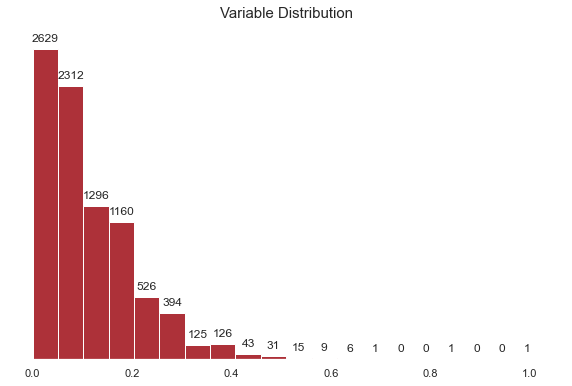

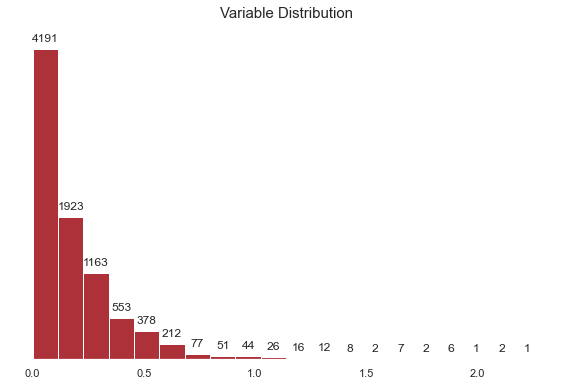

In [193]:
for pronoun in ['avg_self_mentions', 'avg_mentions_others']:
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.hist(df[pronoun], density=False, bins=20)
    ax.axes.get_yaxis().set_visible(False)

    for rect in ax.patches:
        height = rect.get_height()
        ax.annotate(f'{int(height)}', xy=(rect.get_x()+rect.get_width()/2, height), 
                    xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')
    plt.title('Variable Distribution', pad = 15, size = 15)
    plt.show()

In [194]:
for mentions in ['avg_self_mentions', 'avg_mentions_others']:
    
    list_array = []

    for mtype in mbti_types:

        result = df[df['type'] == mtype][mentions]
        list_array.append(result)

    H, pval = stats.kruskal(list_array[0],list_array[1],list_array[2],list_array[3],
                           list_array[4],list_array[5],list_array[6],list_array[7],
                           list_array[8],list_array[9],list_array[10],list_array[11],
                           list_array[12],list_array[13],list_array[14],list_array[15])

    if mentions == 'avg_self_mentions':
        self_mentions = list_array
    
    else:
        mentions_others = list_array
    
    print(mentions)
    print("H-statistic:", H)
    print("P-Value:", pval)

    if pval < 0.05:
        print("Reject NULL hypothesis - Significant differences exist between groups.")
    if pval > 0.05:
        print("Accept NULL hypothesis - No significant difference between groups.")
        
    print()

avg_self_mentions
H-statistic: 94.72156857059169
P-Value: 1.294419496408175e-13
Reject NULL hypothesis - Significant differences exist between groups.

avg_mentions_others
H-statistic: 339.7740273193279
P-Value: 2.882398523899576e-63
Reject NULL hypothesis - Significant differences exist between groups.



**Post hoc Dunn's Adjustment**

In [195]:
dunn = sp.posthoc_dunn(self_mentions, p_adjust='bonferroni', sort=False)

In [196]:
dunn.columns = mbti_types
dunn['types'] = mbti_types
dunn = dunn.set_index('types')

In [197]:
dunn = dunn.round(4)
dunn.style.set_precision(4).applymap(color_dunn)

,ENFJ,ENFP,ENTJ,ENTP,ESFJ,ESFP,ESTJ,ESTP,INFJ,INFP,INTJ,INTP,ISFJ,ISFP,ISTJ,ISTP
types,,,,,,,,,,,,,,,,
ENFJ,1.0000,1.0000,1.0000,1.0000,1.0000,0.3105,1.0000,1.0000,1.0000,1.0000,1.0000,0.5791,1.0000,1.0000,1.0000,1.0000
ENFP,1.0000,1.0000,0.1822,0.4887,1.0000,0.0071,1.0000,1.0000,0.0020,0.0000,0.4347,0.0000,1.0000,0.0001,0.0936,0.0000
ENTJ,1.0000,0.1822,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
ENTP,1.0000,0.4887,1.0000,1.0000,1.0000,0.3538,1.0000,1.0000,1.0000,0.7029,1.0000,0.0229,1.0000,0.5118,1.0000,0.4662
ESFJ,1.0000,1.0000,1.0000,1.0000,1.0000,0.3358,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
ESFP,0.3105,0.0071,1.0000,0.3538,0.3358,1.0000,1.0000,0.7159,0.7713,1.0000,0.2320,1.0000,0.0928,1.0000,1.0000,1.0000
ESTJ,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
ESTP,1.0000,1.0000,1.0000,1.0000,1.0000,0.7159,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
INFJ,1.0000,0.0020,1.0000,1.0000,1.0000,0.7713,1.0000,1.0000,1.0000,1.0000,1.0000,0.0634,1.0000,1.0000,1.0000,1.0000


**Effect Size with Hedges' g - Self Mentions** 

In [198]:
mean = np.mean(df.avg_self_mentions)
std = np.std(df.avg_self_mentions)
print(mean)
print(std)

0.11281453450903364
0.09661799636646752


In [199]:
dictionary = {}

for mtype in mbti_types:
    count = len(df[df['type'] == mtype]['avg_self_mentions'])
    mean = np.mean(df[df['type'] == mtype]['avg_self_mentions'])
    std = np.std(df[df['type'] == mtype]['avg_self_mentions'])
    dictionary[mtype] = [count, mean, std]
    print(f'{mtype}: Count = {count}, Mean = {round(mean,2)}, Std = {round(std,2)}')

ENFJ: Count = 190, Mean = 0.12, Std = 0.1
ENFP: Count = 675, Mean = 0.13, Std = 0.1
ENTJ: Count = 231, Mean = 0.11, Std = 0.1
ENTP: Count = 685, Mean = 0.12, Std = 0.09
ESFJ: Count = 42, Mean = 0.19, Std = 0.21
ESFP: Count = 48, Mean = 0.09, Std = 0.11
ESTJ: Count = 39, Mean = 0.13, Std = 0.12
ESTP: Count = 89, Mean = 0.13, Std = 0.11
INFJ: Count = 1470, Mean = 0.11, Std = 0.1
INFP: Count = 1832, Mean = 0.11, Std = 0.09
INTJ: Count = 1091, Mean = 0.12, Std = 0.1
INTP: Count = 1304, Mean = 0.1, Std = 0.09
ISFJ: Count = 166, Mean = 0.13, Std = 0.11
ISFP: Count = 271, Mean = 0.1, Std = 0.09
ISTJ: Count = 205, Mean = 0.11, Std = 0.09
ISTP: Count = 337, Mean = 0.1, Std = 0.08


In [200]:
hedges = pd.DataFrame(dictionary).T

In [201]:
hedges.columns = ['Count', 'Mean', 'Std']

In [202]:
hedges.head(3)

,Count,Mean,Std
ENFJ,190.0,0.122849,0.097497
ENFP,675.0,0.130792,0.101686
ENTJ,231.0,0.113033,0.102294


[Pooled Standard Deviation](http://goldbook.iupac.org/terms/view/P04758)

In [203]:
items = []

for i in hedges.iterrows():
    
    result = ((i[1][0]-1)*(i[1][2]**2))
    items.append(result)

pooled_std = np.sqrt((sum(items)) / (hedges.Count.sum() - len(hedges.Count)))
pooled_std

0.09597591909147381

In [204]:
items = []

for i in hedges.iterrows():
    result = i[1][0]*i[1][1]
    items.append(result)

pooled_mean = sum(items) / (hedges.Count.sum())
pooled_mean

0.11281453450903363

In [205]:
hedges['hedges_g'] = list(map(lambda x : round((x - pooled_mean)/pooled_std,2), hedges['Mean']))

In [206]:
hedges
hedges.style.applymap(color_rgy, subset=pd.IndexSlice['hedges_g'])

,Count,Mean,Std,hedges_g
ENFJ,190.000000,0.122849,0.097497,0.100000
ENFP,675.000000,0.130792,0.101686,0.190000
ENTJ,231.000000,0.113033,0.102294,0.000000
ENTP,685.000000,0.116902,0.094592,0.040000
ESFJ,42.000000,0.193212,0.205168,0.840000
ESFP,48.000000,0.090611,0.112395,-0.230000
ESTJ,39.000000,0.129880,0.124049,0.180000
ESTP,89.000000,0.129536,0.114835,0.170000
INFJ,1470.000000,0.114433,0.096947,0.020000
INFP,1832.000000,0.107063,0.093344,-0.060000


**Effect Size with Hedges' g - Mentions Others**

In [207]:
mean = np.mean(df.avg_mentions_others)
std = np.std(df.avg_mentions_others)
print(mean)
print(std)

0.1851896498094861
0.21731004498491116


In [208]:
dictionary = {}

for mtype in mbti_types:
    count = len(df[df['type'] == mtype]['avg_mentions_others'])
    mean = np.mean(df[df['type'] == mtype]['avg_mentions_others'])
    std = np.std(df[df['type'] == mtype]['avg_mentions_others'])
    dictionary[mtype] = [count, mean, std]
    print(f'{mtype}: Count = {count}, Mean = {round(mean,2)}, Std = {round(std,2)}')

ENFJ: Count = 190, Mean = 0.23, Std = 0.21
ENFP: Count = 675, Mean = 0.23, Std = 0.23
ENTJ: Count = 231, Mean = 0.25, Std = 0.24
ENTP: Count = 685, Mean = 0.23, Std = 0.24
ESFJ: Count = 42, Mean = 0.32, Std = 0.22
ESFP: Count = 48, Mean = 0.3, Std = 0.36
ESTJ: Count = 39, Mean = 0.26, Std = 0.26
ESTP: Count = 89, Mean = 0.3, Std = 0.32
INFJ: Count = 1470, Mean = 0.19, Std = 0.22
INFP: Count = 1832, Mean = 0.15, Std = 0.2
INTJ: Count = 1091, Mean = 0.17, Std = 0.2
INTP: Count = 1304, Mean = 0.16, Std = 0.2
ISFJ: Count = 166, Mean = 0.21, Std = 0.22
ISFP: Count = 271, Mean = 0.24, Std = 0.27
ISTJ: Count = 205, Mean = 0.17, Std = 0.22
ISTP: Count = 337, Mean = 0.14, Std = 0.18


In [209]:
hedges = pd.DataFrame(dictionary).T

In [210]:
hedges.columns = ['Count', 'Mean', 'Std']

In [211]:
hedges.head(3)

,Count,Mean,Std
ENFJ,190.0,0.226153,0.206475
ENFP,675.0,0.233026,0.226798
ENTJ,231.0,0.249530,0.240394


[Pooled Standard Deviation](http://goldbook.iupac.org/terms/view/P04758)

In [212]:
items = []

for i in hedges.iterrows():
    
    result = ((i[1][0]-1)*(i[1][2]**2))
    items.append(result)

pooled_std = np.sqrt((sum(items)) / (hedges.Count.sum() - len(hedges.Count)))
pooled_std

0.21405533426765172

In [213]:
items = []

for i in hedges.iterrows():
    result = i[1][0]*i[1][1]
    items.append(result)

pooled_mean = sum(items) / (hedges.Count.sum())
pooled_mean

0.18518964980948607

In [214]:
hedges['hedges_g'] = list(map(lambda x : round((x - pooled_mean)/pooled_std,2), hedges['Mean']))

In [215]:
hedges
hedges.style.applymap(color_rgy, subset=pd.IndexSlice['hedges_g'])

,Count,Mean,Std,hedges_g
ENFJ,190.000000,0.226153,0.206475,0.190000
ENFP,675.000000,0.233026,0.226798,0.220000
ENTJ,231.000000,0.249530,0.240394,0.300000
ENTP,685.000000,0.231661,0.235361,0.220000
ESFJ,42.000000,0.318219,0.219874,0.620000
ESFP,48.000000,0.303805,0.361027,0.550000
ESTJ,39.000000,0.256417,0.260113,0.330000
ESTP,89.000000,0.301602,0.320970,0.540000
INFJ,1470.000000,0.185528,0.216905,0.000000
INFP,1832.000000,0.151271,0.195156,-0.160000


<a id=pronouns></a>

<br>
<br>

### Use of Pronouns

***

In [216]:
df.columns

Index(['type', 'I', 'J', 'N', 'T', 'NF', 'NT', 'SP', 'SJ',
       'avg_num_char_x_post', 'avg_links', 'avg_emoticons_per_post',
       'avg_self_mentions', 'avg_mentions_others', 'avg_total_mentions',
       'avg_first_person', 'avg_second_person', 'avg_third_person',
       'avg_positive_words', 'avg_negative_words'],
      dtype='object')

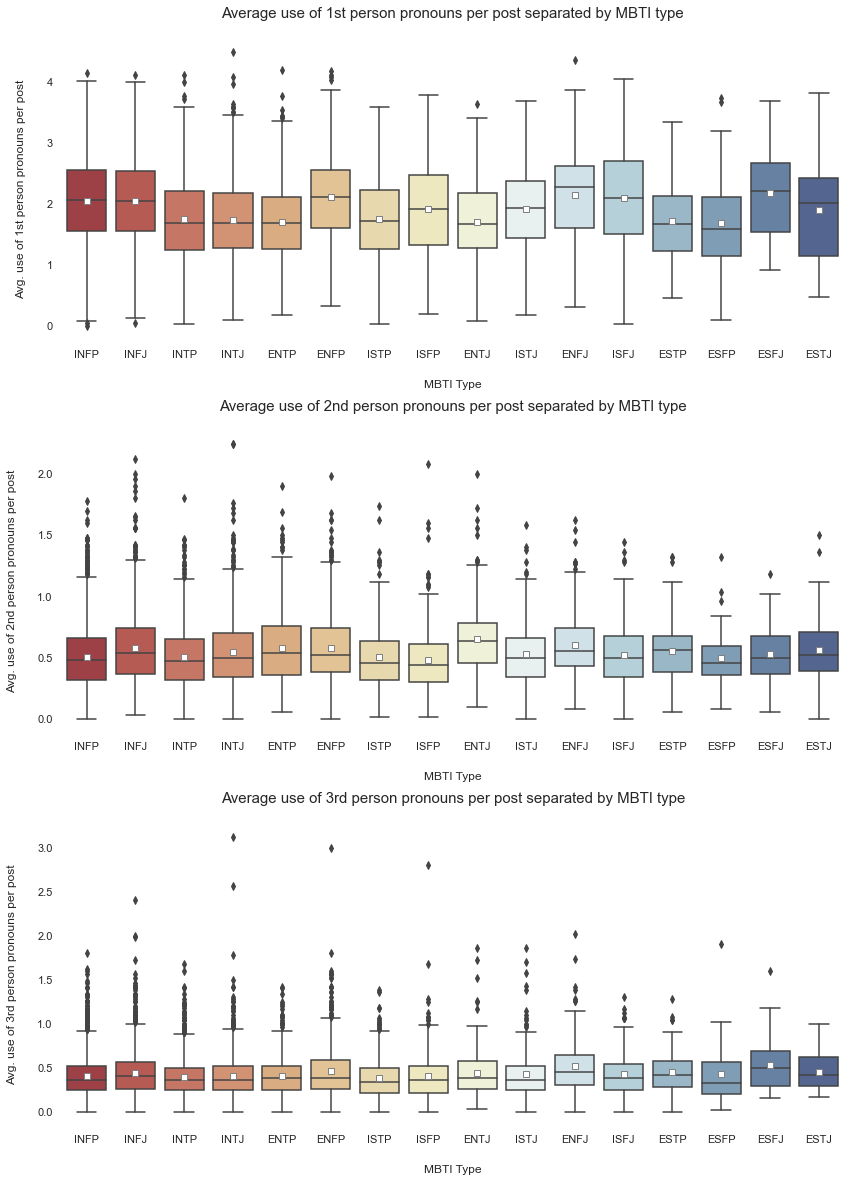

In [217]:
plt.figure(figsize=(14,20))
plt.subplots_adjust(hspace=0.3)


plt.subplot(3,1,1)
sns.set_palette(sns.color_palette(list(colors_types.values())))
sns.boxplot(x='type',y='avg_first_person', data=df, order=sorter, showmeans=True, meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"grey"})

plt.title('Average use of 1st person pronouns per post separated by MBTI type', size=15, pad=20)
plt.xlabel('MBTI Type', labelpad=20)
plt.ylabel('Avg. use of 1st person pronouns per post', labelpad=20)


plt.subplot(3,1,2)
sns.set_palette(sns.color_palette(list(colors_types.values())))
sns.boxplot(x='type',y='avg_second_person', data=df, order=sorter, showmeans=True, meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"grey"})

plt.title('Average use of 2nd person pronouns per post separated by MBTI type', size=15, pad=20)
plt.xlabel('MBTI Type', labelpad=20)
plt.ylabel('Avg. use of 2nd person pronouns per post', labelpad=20)

plt.subplot(3,1,3)
sns.set_palette(sns.color_palette(list(colors_types.values())))
sns.boxplot(x='type',y='avg_third_person', data=df, order=sorter, showmeans=True, meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"grey"})

plt.title('Average use of 3rd person pronouns per post separated by MBTI type', size=15, pad=20)
plt.xlabel('MBTI Type', labelpad=20)
plt.ylabel('Avg. use of 3rd person pronouns per post', labelpad=20)


plt.savefig('Figures/Use_Pronouns.png', dpi=300)

plt.show()

**Test for Normality**

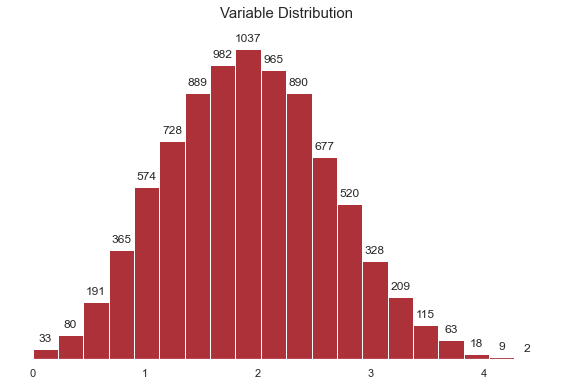

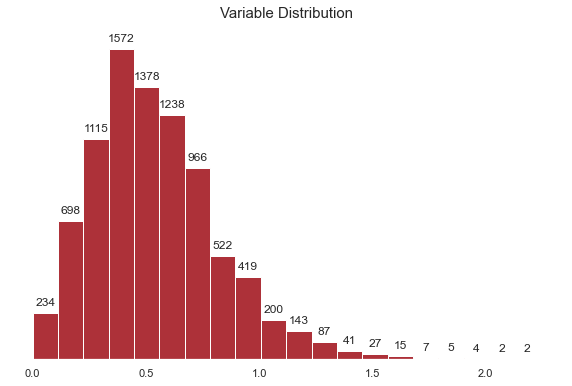

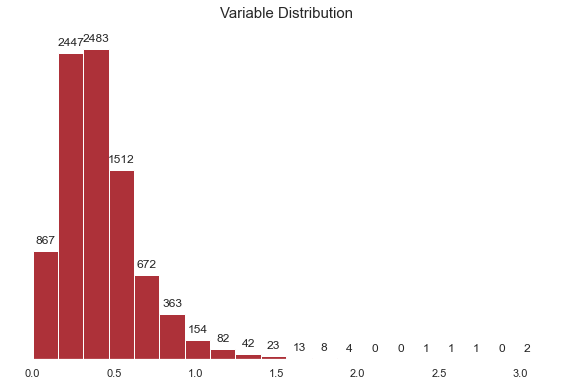

In [218]:
for pronoun in ['avg_first_person', 'avg_second_person', 'avg_third_person']:
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.hist(df[pronoun], density=False, bins=20)
    ax.axes.get_yaxis().set_visible(False)

    for rect in ax.patches:
        height = rect.get_height()
        ax.annotate(f'{int(height)}', xy=(rect.get_x()+rect.get_width()/2, height), 
                    xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')
    plt.title('Variable Distribution', pad = 15, size = 15)
    plt.show()

In [219]:
x = df.avg_first_person

# Shapiro-Wilk normality test
stat, p = stats.shapiro(x)
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.997, p=0.000
Sample does not look Gaussian (reject H0)


/Users/diego/.pyenv/versions/venv-MBTI/lib/python3.8/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


**Kruskal-Wallis Test by Ranks**

In [220]:
for pronoun in ['avg_first_person', 'avg_second_person', 'avg_third_person']:
    
    list_array = []

    for mtype in mbti_types:

        result = df[df['type'] == mtype][pronoun]
        list_array.append(result)

    H, pval = stats.kruskal(list_array[0],list_array[1],list_array[2],list_array[3],
                           list_array[4],list_array[5],list_array[6],list_array[7],
                           list_array[8],list_array[9],list_array[10],list_array[11],
                           list_array[12],list_array[13],list_array[14],list_array[15])

    if pronoun == 'avg_first_person':
        first_person = list_array
    
    elif pronoun == 'avg_second_person':
        second_person = list_array
    
    else:
        third_person = list_array
    
    print(pronoun)
    print("H-statistic:", H)
    print("P-Value:", pval)

    if pval < 0.05:
        print("Reject NULL hypothesis - Significant differences exist between groups.")
    if pval > 0.05:
        print("Accept NULL hypothesis - No significant difference between groups.")
        
    print()

avg_first_person
H-statistic: 461.2387713020367
P-Value: 8.75636889714727e-89
Reject NULL hypothesis - Significant differences exist between groups.

avg_second_person
H-statistic: 170.04533190470625
P-Value: 2.3936595628348836e-28
Reject NULL hypothesis - Significant differences exist between groups.

avg_third_person
H-statistic: 78.5806518537404
P-Value: 1.2683678045017268e-10
Reject NULL hypothesis - Significant differences exist between groups.



**Post hoc Dunn's Adjustment**

In [221]:
dunn = sp.posthoc_dunn(first_person, p_adjust='bonferroni', sort=False)
dunn.columns = mbti_types
dunn['types'] = mbti_types
dunn = dunn.set_index('types')
dunn = dunn.round(4)
dunn.style.set_precision(4).applymap(color_dunn)

,ENFJ,ENFP,ENTJ,ENTP,ESFJ,ESFP,ESTJ,ESTP,INFJ,INFP,INTJ,INTP,ISFJ,ISFP,ISTJ,ISTP
types,,,,,,,,,,,,,,,,
ENFJ,1.0000,1.0000,0.0000,0.0000,1.0000,0.0062,1.0000,0.0003,1.0000,1.0000,0.0000,0.0000,1.0000,0.0779,0.1814,0.0000
ENFP,1.0000,1.0000,0.0000,0.0000,1.0000,0.0096,1.0000,0.0002,1.0000,1.0000,0.0000,0.0000,1.0000,0.0404,0.1691,0.0000
ENTJ,0.0000,0.0000,1.0000,1.0000,0.0087,1.0000,1.0000,1.0000,0.0000,0.0000,1.0000,1.0000,0.0000,0.1113,0.2141,1.0000
ENTP,0.0000,0.0000,1.0000,1.0000,0.0034,1.0000,1.0000,1.0000,0.0000,0.0000,1.0000,1.0000,0.0000,0.0043,0.0197,1.0000
ESFJ,1.0000,1.0000,0.0087,0.0034,1.0000,0.1104,1.0000,0.0646,1.0000,1.0000,0.0068,0.0109,1.0000,1.0000,1.0000,0.0220
ESFP,0.0062,0.0096,1.0000,1.0000,0.1104,1.0000,1.0000,1.0000,0.0565,0.0412,1.0000,1.0000,0.0763,1.0000,1.0000,1.0000
ESTJ,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
ESTP,0.0003,0.0002,1.0000,1.0000,0.0646,1.0000,1.0000,1.0000,0.0029,0.0017,1.0000,1.0000,0.0134,1.0000,1.0000,1.0000
INFJ,1.0000,1.0000,0.0000,0.0000,1.0000,0.0565,1.0000,0.0029,1.0000,1.0000,0.0000,0.0000,1.0000,0.7224,1.0000,0.0000


In [222]:
dunn = sp.posthoc_dunn(second_person, p_adjust='bonferroni', sort=False)
dunn.columns = mbti_types
dunn['types'] = mbti_types
dunn = dunn.set_index('types')
dunn = dunn.round(4)
dunn.style.set_precision(4).applymap(color_dunn)

,ENFJ,ENFP,ENTJ,ENTP,ESFJ,ESFP,ESTJ,ESTP,INFJ,INFP,INTJ,INTP,ISFJ,ISFP,ISTJ,ISTP
types,,,,,,,,,,,,,,,,
ENFJ,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0001,0.3707,0.0002,0.3452,0.0000,0.4994,0.0009
ENFP,1.0000,1.0000,0.0326,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000,1.0000,0.0000,1.0000,0.0000,1.0000,0.0020
ENTJ,1.0000,0.0326,1.0000,0.0213,1.0000,0.0583,1.0000,0.8421,0.0064,0.0000,0.0000,0.0000,0.0004,0.0000,0.0004,0.0000
ENTP,1.0000,1.0000,0.0213,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000,1.0000,0.0000,1.0000,0.0000,1.0000,0.0031
ESFJ,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
ESFP,1.0000,1.0000,0.0583,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
ESTJ,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
ESTP,1.0000,1.0000,0.8421,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.8078,1.0000,1.0000
INFJ,1.0000,1.0000,0.0064,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000,1.0000,0.0000,1.0000,0.0000,1.0000,0.0005


In [223]:
dunn = sp.posthoc_dunn(third_person, p_adjust='bonferroni', sort=False)
dunn.columns = mbti_types
dunn['types'] = mbti_types
dunn = dunn.set_index('types')
dunn = dunn.round(4)
dunn.style.set_precision(4).applymap(color_dunn)

,ENFJ,ENFP,ENTJ,ENTP,ESFJ,ESFP,ESTJ,ESTP,INFJ,INFP,INTJ,INTP,ISFJ,ISFP,ISTJ,ISTP
types,,,,,,,,,,,,,,,,
ENFJ,1.0000,0.6469,1.0000,0.0085,1.0000,0.8103,1.0000,1.0000,0.1538,0.0000,0.0005,0.0000,0.5823,0.0008,0.0534,0.0000
ENFP,0.6469,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0486,0.8374,0.0095,1.0000,0.6844,1.0000,0.0291
ENTJ,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.8921,1.0000,1.0000,1.0000,0.4304
ENTP,0.0085,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
ESFJ,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.3262,0.6078,0.1879,1.0000,0.2657,1.0000,0.0863
ESFP,0.8103,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
ESTJ,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
ESTP,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.8455
INFJ,0.1538,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0081,0.5893,0.0013,1.0000,0.8100,1.0000,0.0232


[Dunn Interpretation](https://stats.stackexchange.com/questions/126686/how-to-read-the-results-of-dunns-test)

**Effect Size with Hedges' g - 1st Person**

In [224]:

mean = np.mean(df['avg_first_person'])
std = np.std(df['avg_first_person'])
print('avg_first_person')
print(mean)
print(std)

avg_first_person
1.9174696275241312
0.719006195676464


In [225]:
dictionary = {}

for mtype in mbti_types:
    count = len(df[df['type'] == mtype]['avg_first_person'])
    mean = np.mean(df[df['type'] == mtype]['avg_first_person'])
    std = np.std(df[df['type'] == mtype]['avg_first_person'])
    dictionary[mtype] = [count, mean, std]

In [226]:
hedges = pd.DataFrame(dictionary).T

In [227]:
hedges.columns = ['Count', 'Mean', 'Std']

In [228]:
hedges.head(3)

,Count,Mean,Std
ENFJ,190.0,2.156065,0.761528
ENFP,675.0,2.112340,0.687673
ENTJ,231.0,1.718482,0.641797


[Pooled Standard Deviation](http://goldbook.iupac.org/terms/view/P04758)

In [229]:
items = []

for i in hedges.iterrows():
    
    result = ((i[1][0]-1)*(i[1][2]**2))
    items.append(result)

pooled_std = np.sqrt((sum(items)) / (hedges.Count.sum() - len(hedges.Count)))
pooled_std

0.7004903674997416

In [230]:
items = []

for i in hedges.iterrows():
    result = i[1][0]*i[1][1]
    items.append(result)

pooled_mean = sum(items) / (hedges.Count.sum())
pooled_mean

1.9174696275241312

In [231]:
hedges['hedges_g'] = list(map(lambda x : round((x - pooled_mean)/pooled_std,2), hedges['Mean']))

In [232]:
def color_rgy(val):
    if val > 0.8 or val < -0.8:
        color = 'red'
        return 'background-color: %s' % color
    elif val > 0.5 or val < -0.5:
        color = 'orange'
        return 'background-color: %s' % color
    elif val > 0.2 or val < -0.2:
        color = 'lightgreen'
        return 'background-color: %s' % color
    else:
        color = None
        return 'background-color: %s' % color

In [233]:
hedges
hedges.style.applymap(color_rgy, subset=pd.IndexSlice['hedges_g'])

,Count,Mean,Std,hedges_g
ENFJ,190.000000,2.156065,0.761528,0.340000
ENFP,675.000000,2.112340,0.687673,0.280000
ENTJ,231.000000,1.718482,0.641797,-0.280000
ENTP,685.000000,1.717857,0.645094,-0.280000
ESFJ,42.000000,2.190691,0.686891,0.390000
ESFP,48.000000,1.689188,0.829018,-0.330000
ESTJ,39.000000,1.912215,0.832724,-0.010000
ESTP,89.000000,1.735107,0.627877,-0.260000
INFJ,1470.000000,2.047177,0.714856,0.190000
INFP,1832.000000,2.060135,0.722619,0.200000


**Effect Size with Hedges' g - 2nd Person**

In [234]:
mean = np.mean(df['avg_second_person'])
std = np.std(df['avg_second_person'])
print('avg_second_person')
print(mean)
print(std)

avg_second_person
0.542157227484052
0.2807436521655962


In [235]:
dictionary = {}

for mtype in mbti_types:
    count = len(df[df['type'] == mtype]['avg_second_person'])
    mean = np.mean(df[df['type'] == mtype]['avg_second_person'])
    std = np.std(df[df['type'] == mtype]['avg_second_person'])
    dictionary[mtype] = [count, mean, std]

In [236]:
hedges = pd.DataFrame(dictionary).T

In [237]:
hedges.columns = ['Count', 'Mean', 'Std']

In [238]:
hedges.head(3)

,Count,Mean,Std
ENFJ,190.0,0.604856,0.273847
ENFP,675.0,0.582707,0.293039
ENTJ,231.0,0.650012,0.289288


[Pooled Standard Deviation](http://goldbook.iupac.org/terms/view/P04758)

In [239]:
items = []

for i in hedges.iterrows():
    
    result = ((i[1][0]-1)*(i[1][2]**2))
    items.append(result)

pooled_std = np.sqrt((sum(items)) / (hedges.Count.sum() - len(hedges.Count)))
pooled_std

0.2780137138011088

In [240]:
items = []

for i in hedges.iterrows():
    result = i[1][0]*i[1][1]
    items.append(result)

pooled_mean = sum(items) / (hedges.Count.sum())
pooled_mean

0.542157227484052

In [241]:
hedges['hedges_g'] = list(map(lambda x : round((x - pooled_mean)/pooled_std,2), hedges['Mean']))

In [242]:
def color_rgy(val):
    if val > 0.8 or val < -0.8:
        color = 'red'
        return 'background-color: %s' % color
    elif val > 0.5 or val < -0.5:
        color = 'orange'
        return 'background-color: %s' % color
    elif val > 0.2 or val < -0.2:
        color = 'lightgreen'
        return 'background-color: %s' % color
    else:
        color = None
        return 'background-color: %s' % color

In [243]:
hedges
hedges.style.applymap(color_rgy, subset=pd.IndexSlice['hedges_g'])

,Count,Mean,Std,hedges_g
ENFJ,190.000000,0.604856,0.273847,0.230000
ENFP,675.000000,0.582707,0.293039,0.150000
ENTJ,231.000000,0.650012,0.289288,0.390000
ENTP,685.000000,0.576017,0.281573,0.120000
ESFJ,42.000000,0.526425,0.234690,-0.060000
ESFP,48.000000,0.494795,0.235303,-0.170000
ESTJ,39.000000,0.565918,0.300626,0.090000
ESTP,89.000000,0.556439,0.267066,0.050000
INFJ,1470.000000,0.578613,0.292642,0.130000
INFP,1832.000000,0.508824,0.273620,-0.120000


**Effect Size with Hedges' g - 3rd Person**

In [244]:
mean = np.mean(df['avg_third_person'])
std = np.std(df['avg_third_person'])
print(pronoun)
print(mean)
print(std)

avg_third_person
0.41596754497288446
0.25239928345744883


In [245]:
dictionary = {}

for mtype in mbti_types:
    count = len(df[df['type'] == mtype]['avg_third_person'])
    mean = np.mean(df[df['type'] == mtype]['avg_third_person'])
    std = np.std(df[df['type'] == mtype]['avg_third_person'])
    dictionary[mtype] = [count, mean, std]

In [246]:
hedges = pd.DataFrame(dictionary).T

In [247]:
hedges.columns = ['Count', 'Mean', 'Std']

In [248]:
hedges.head(3)

,Count,Mean,Std
ENFJ,190.0,0.518155,0.316596
ENFP,675.0,0.458367,0.304990
ENTJ,231.0,0.442233,0.263301


[Pooled Standard Deviation](http://goldbook.iupac.org/terms/view/P04758)

In [249]:
items = []

for i in hedges.iterrows():
    
    result = ((i[1][0]-1)*(i[1][2]**2))
    items.append(result)

pooled_std = np.sqrt((sum(items)) / (hedges.Count.sum() - len(hedges.Count)))
pooled_std

0.25090778578017303

In [250]:
items = []

for i in hedges.iterrows():
    result = i[1][0]*i[1][1]
    items.append(result)

pooled_mean = sum(items) / (hedges.Count.sum())
pooled_mean

0.41596754497288446

In [251]:
hedges['hedges_g'] = list(map(lambda x : round((x - pooled_mean)/pooled_std,2), hedges['Mean']))

In [252]:
def color_rgy(val):
    if val > 0.8 or val < -0.8:
        color = 'red'
        return 'background-color: %s' % color
    elif val > 0.5 or val < -0.5:
        color = 'orange'
        return 'background-color: %s' % color
    elif val > 0.2 or val < -0.2:
        color = 'lightgreen'
        return 'background-color: %s' % color
    else:
        color = None
        return 'background-color: %s' % color

In [253]:
hedges
hedges.style.applymap(color_rgy, subset=pd.IndexSlice['hedges_g'])

,Count,Mean,Std,hedges_g
ENFJ,190.000000,0.518155,0.316596,0.410000
ENFP,675.000000,0.458367,0.304990,0.170000
ENTJ,231.000000,0.442233,0.263301,0.100000
ENTP,685.000000,0.408339,0.222634,-0.030000
ESFJ,42.000000,0.529053,0.294195,0.450000
ESFP,48.000000,0.421837,0.329852,0.020000
ESTJ,39.000000,0.451172,0.210915,0.140000
ESTP,89.000000,0.449304,0.238351,0.130000
INFJ,1470.000000,0.433461,0.254024,0.070000
INFP,1832.000000,0.399831,0.233494,-0.060000


<a id=posneg></a>

<br>
<br>

### Use of Positive and Negative Words

***

In [254]:
df.columns

Index(['type', 'I', 'J', 'N', 'T', 'NF', 'NT', 'SP', 'SJ',
       'avg_num_char_x_post', 'avg_links', 'avg_emoticons_per_post',
       'avg_self_mentions', 'avg_mentions_others', 'avg_total_mentions',
       'avg_first_person', 'avg_second_person', 'avg_third_person',
       'avg_positive_words', 'avg_negative_words'],
      dtype='object')

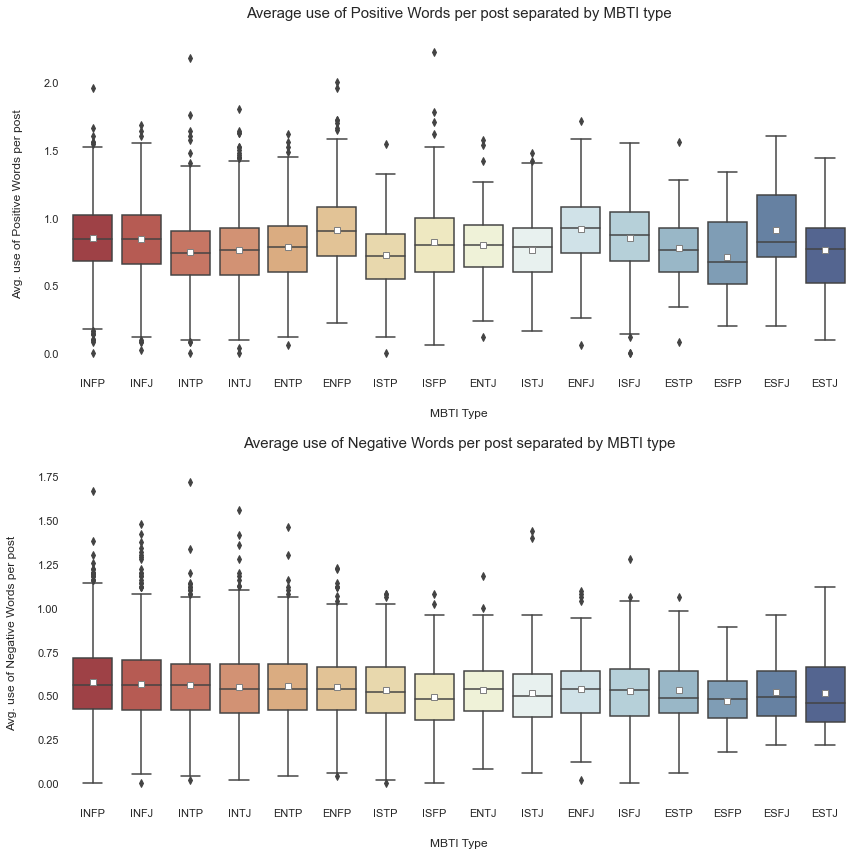

In [255]:
plt.figure(figsize=(14,14))
plt.subplots_adjust(hspace=0.3)


plt.subplot(2,1,1)
sns.set_palette(sns.color_palette(list(colors_types.values())))
sns.boxplot(x='type',y='avg_positive_words', data=df, order=sorter, showmeans=True, meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"grey"})

plt.title('Average use of Positive Words per post separated by MBTI type', size=15, pad=20)
plt.xlabel('MBTI Type', labelpad=20)
plt.ylabel('Avg. use of Positive Words per post', labelpad=20)


plt.subplot(2,1,2)
sns.set_palette(sns.color_palette(list(colors_types.values())))
sns.boxplot(x='type',y='avg_negative_words', data=df, order=sorter, showmeans=True, meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"grey"})

plt.title('Average use of Negative Words per post separated by MBTI type', size=15, pad=20)
plt.xlabel('MBTI Type', labelpad=20)
plt.ylabel('Avg. use of Negative Words per post', labelpad=20)


plt.savefig('Figures/Use_Positive_Negative.png', dpi=300)

plt.show()

**Test for Normality**

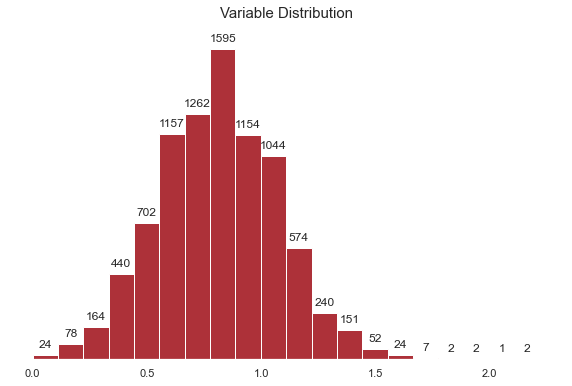

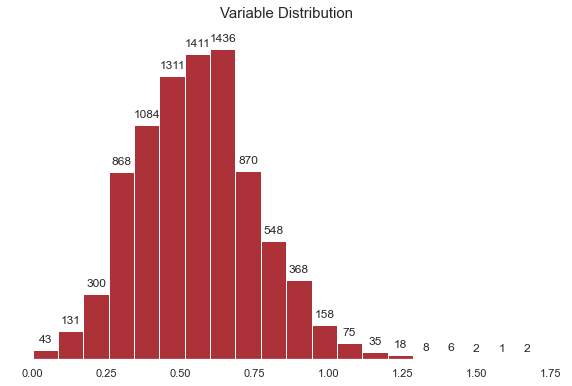

In [256]:
for words in ['avg_positive_words', 'avg_negative_words']:
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.hist(df[words], density=False, bins=20)
    ax.axes.get_yaxis().set_visible(False)

    for rect in ax.patches:
        height = rect.get_height()
        ax.annotate(f'{int(height)}', xy=(rect.get_x()+rect.get_width()/2, height), 
                    xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')
    plt.title('Variable Distribution', pad = 15, size = 15)
    plt.show()

In [257]:
x = df.avg_positive_words

# Shapiro-Wilk normality test
stat, p = stats.shapiro(x)
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.997, p=0.000
Sample does not look Gaussian (reject H0)


/Users/diego/.pyenv/versions/venv-MBTI/lib/python3.8/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


**Kruskal-Wallis Test by Ranks**

In [258]:
for words in ['avg_positive_words', 'avg_negative_words']:
    
    list_array = []

    for mtype in mbti_types:

        result = df[df['type'] == mtype][words]
        list_array.append(result)

    H, pval = stats.kruskal(list_array[0],list_array[1],list_array[2],list_array[3],
                           list_array[4],list_array[5],list_array[6],list_array[7],
                           list_array[8],list_array[9],list_array[10],list_array[11],
                           list_array[12],list_array[13],list_array[14],list_array[15])

    if words == 'avg_positive_words':
        positive_words = list_array
    
    else:
        negative_words = list_array
    
    print(pronoun)
    print("H-statistic:", H)
    print("P-Value:", pval)

    if pval < 0.05:
        print("Reject NULL hypothesis - Significant differences exist between groups.")
    if pval > 0.05:
        print("Accept NULL hypothesis - No significant difference between groups.")
        
    print()

avg_third_person
H-statistic: 370.60401962472514
P-Value: 1.0206295389287791e-69
Reject NULL hypothesis - Significant differences exist between groups.

avg_third_person
H-statistic: 84.30340110869719
P-Value: 1.1312706705948667e-11
Reject NULL hypothesis - Significant differences exist between groups.



**Post hoc Dunn's Adjustment**

In [259]:
dunn = sp.posthoc_dunn(positive_words, p_adjust='bonferroni', sort=False)
dunn.columns = mbti_types
dunn['types'] = mbti_types
dunn = dunn.set_index('types')
dunn = dunn.round(4)
dunn.style.set_precision(4).applymap(color_dunn)

,ENFJ,ENFP,ENTJ,ENTP,ESFJ,ESFP,ESTJ,ESTP,INFJ,INFP,INTJ,INTP,ISFJ,ISFP,ISTJ,ISTP
types,,,,,,,,,,,,,,,,
ENFJ,1.0000,1.0000,0.0029,0.0000,1.0000,0.0007,0.0918,0.0032,0.1708,0.3900,0.0000,0.0000,1.0000,0.0140,0.0000,0.0000
ENFP,1.0000,1.0000,0.0000,0.0000,1.0000,0.0003,0.0666,0.0006,0.0002,0.0009,0.0000,0.0000,1.0000,0.0002,0.0000,0.0000
ENTJ,0.0029,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.8022,1.0000,0.2998,1.0000,1.0000,1.0000,0.0843
ENTP,0.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000,0.0000,1.0000,0.2125,0.1042,1.0000,1.0000,0.1067
ESFJ,1.0000,1.0000,1.0000,1.0000,1.0000,0.2454,1.0000,1.0000,1.0000,1.0000,0.2364,0.0546,1.0000,1.0000,0.7575,0.0168
ESFP,0.0007,0.0003,1.0000,1.0000,0.2454,1.0000,1.0000,1.0000,0.1120,0.0629,1.0000,1.0000,0.1247,1.0000,1.0000,1.0000
ESTJ,0.0918,0.0666,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
ESTP,0.0032,0.0006,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.8662,0.4465,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
INFJ,0.1708,0.0002,1.0000,0.0000,1.0000,0.1120,1.0000,0.8662,1.0000,1.0000,0.0000,0.0000,1.0000,1.0000,0.0084,0.0000


In [260]:
dunn = sp.posthoc_dunn(negative_words, p_adjust='bonferroni', sort=False)
dunn.columns = mbti_types
dunn['types'] = mbti_types
dunn = dunn.set_index('types')
dunn = dunn.round(4)
dunn.style.set_precision(4).applymap(color_dunn)

,ENFJ,ENFP,ENTJ,ENTP,ESFJ,ESFP,ESTJ,ESTP,INFJ,INFP,INTJ,INTP,ISFJ,ISFP,ISTJ,ISTP
types,,,,,,,,,,,,,,,,
ENFJ,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
ENFP,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.1689,1.0000,1.0000,1.0000,0.0342,1.0000,1.0000
ENTJ,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.3335,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
ENTP,1.0000,1.0000,1.0000,1.0000,1.0000,0.5190,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0045,0.7776,1.0000
ESFJ,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
ESFP,1.0000,1.0000,1.0000,0.5190,1.0000,1.0000,1.0000,1.0000,0.1452,0.0305,0.8446,0.2398,1.0000,1.0000,1.0000,1.0000
ESTJ,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
ESTP,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
INFJ,1.0000,1.0000,1.0000,1.0000,1.0000,0.1452,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000,0.0445,1.0000


**Effect Size with Hedges' g - Positive Words**

In [261]:
mean = np.mean(df['avg_positive_words'])
std = np.std(df['avg_positive_words'])
print('avg_positive_words')
print(mean)
print(std)

avg_positive_words
0.8104558938304398
0.2629834717098421


In [262]:
dictionary = {}

for mtype in mbti_types:
    count = len(df[df['type'] == mtype]['avg_positive_words'])
    mean = np.mean(df[df['type'] == mtype]['avg_positive_words'])
    std = np.std(df[df['type'] == mtype]['avg_positive_words'])
    dictionary[mtype] = [count, mean, std]

In [263]:
hedges = pd.DataFrame(dictionary).T

In [264]:
hedges.columns = ['Count', 'Mean', 'Std']

In [265]:
hedges.head(3)

,Count,Mean,Std
ENFJ,190.0,0.912993,0.270796
ENFP,675.0,0.907816,0.264488
ENTJ,231.0,0.796711,0.231039


[Pooled Standard Deviation](http://goldbook.iupac.org/terms/view/P04758)

In [266]:
items = []

for i in hedges.iterrows():
    
    result = ((i[1][0]-1)*(i[1][2]**2))
    items.append(result)

pooled_std = np.sqrt((sum(items)) / (hedges.Count.sum() - len(hedges.Count)))
pooled_std

0.2573390390700272

In [267]:
items = []

for i in hedges.iterrows():
    result = i[1][0]*i[1][1]
    items.append(result)

pooled_mean = sum(items) / (hedges.Count.sum())
pooled_mean

0.81045589383044

In [268]:
hedges['hedges_g'] = list(map(lambda x : round((x - pooled_mean)/pooled_std,2), hedges['Mean']))

In [269]:
def color_rgy(val):
    if val > 0.8 or val < -0.8:
        color = 'red'
        return 'background-color: %s' % color
    elif val > 0.5 or val < -0.5:
        color = 'orange'
        return 'background-color: %s' % color
    elif val > 0.2 or val < -0.2:
        color = 'lightgreen'
        return 'background-color: %s' % color
    else:
        color = None
        return 'background-color: %s' % color

In [270]:
hedges
hedges.style.applymap(color_rgy, subset=pd.IndexSlice['hedges_g'])

,Count,Mean,Std,hedges_g
ENFJ,190.000000,0.912993,0.270796,0.400000
ENFP,675.000000,0.907816,0.264488,0.380000
ENTJ,231.000000,0.796711,0.231039,-0.050000
ENTP,685.000000,0.781972,0.246691,-0.110000
ESFJ,42.000000,0.905231,0.324448,0.370000
ESFP,48.000000,0.708524,0.283389,-0.400000
ESTJ,39.000000,0.759134,0.308901,-0.200000
ESTP,89.000000,0.772167,0.246052,-0.150000
INFJ,1470.000000,0.841824,0.259682,0.120000
INFP,1832.000000,0.846775,0.261805,0.140000


**Effect Size with Hedges' g - 2nd Person**

In [271]:
mean = np.mean(df['avg_negative_words'])
std = np.std(df['avg_negative_words'])
print('avg_negative_words')
print(mean)
print(std)

avg_negative_words
0.5548096924100051
0.20400157955596881


In [272]:
dictionary = {}

for mtype in mbti_types:
    count = len(df[df['type'] == mtype]['avg_negative_words'])
    mean = np.mean(df[df['type'] == mtype]['avg_negative_words'])
    std = np.std(df[df['type'] == mtype]['avg_negative_words'])
    dictionary[mtype] = [count, mean, std]

In [273]:
hedges = pd.DataFrame(dictionary).T

In [274]:
hedges.columns = ['Count', 'Mean', 'Std']

In [275]:
hedges.head(3)

,Count,Mean,Std
ENFJ,190.0,0.537347,0.191011
ENFP,675.0,0.546744,0.188924
ENTJ,231.0,0.534237,0.182972


[Pooled Standard Deviation](http://goldbook.iupac.org/terms/view/P04758)

In [276]:
items = []

for i in hedges.iterrows():
    
    result = ((i[1][0]-1)*(i[1][2]**2))
    items.append(result)

pooled_std = np.sqrt((sum(items)) / (hedges.Count.sum() - len(hedges.Count)))
pooled_std

0.2029804537722436

In [277]:
items = []

for i in hedges.iterrows():
    result = i[1][0]*i[1][1]
    items.append(result)

pooled_mean = sum(items) / (hedges.Count.sum())
pooled_mean

0.5548096924100051

In [278]:
hedges['hedges_g'] = list(map(lambda x : round((x - pooled_mean)/pooled_std,2), hedges['Mean']))

In [279]:
def color_rgy(val):
    if val > 0.8 or val < -0.8:
        color = 'red'
        return 'background-color: %s' % color
    elif val > 0.5 or val < -0.5:
        color = 'orange'
        return 'background-color: %s' % color
    elif val > 0.2 or val < -0.2:
        color = 'lightgreen'
        return 'background-color: %s' % color
    else:
        color = None
        return 'background-color: %s' % color

In [280]:
hedges
hedges.style.applymap(color_rgy, subset=pd.IndexSlice['hedges_g'])

,Count,Mean,Std,hedges_g
ENFJ,190.000000,0.537347,0.191011,-0.090000
ENFP,675.000000,0.546744,0.188924,-0.040000
ENTJ,231.000000,0.534237,0.182972,-0.100000
ENTP,685.000000,0.555869,0.197840,0.010000
ESFJ,42.000000,0.519670,0.180334,-0.170000
ESFP,48.000000,0.471626,0.145728,-0.410000
ESTJ,39.000000,0.512554,0.208766,-0.210000
ESTP,89.000000,0.529617,0.197681,-0.120000
INFJ,1470.000000,0.566136,0.211640,0.060000
INFP,1832.000000,0.578066,0.213215,0.110000
